In [103]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re


def get_results(model_dir_directory, results_file_name="results.txt"):
        acc_rgb_text_location = os.path.join(model_dir_directory, results_file_name)

        # Accuracy values from the text file
        acc_rgb_values_text = open(acc_rgb_text_location).read()

        miou_start_search = "mious:"
        iou_std_start_search = "iou_stds:"

        float_regex = r"[-+]?\d*\.\d+|\d+"

        # Parse accuracy values from the text file
        miou_values = []
        iou_std_values = []
        for i, line in enumerate(acc_rgb_values_text.split("\n")):
            if miou_start_search in line and iou_std_start_search in line:
                line_1 = line.split(miou_start_search)[1].split("],")[0]
                miou_values.append([float(x) for x in re.findall(float_regex, line_1)])
                line_2 = line.split(iou_std_start_search)[1].split("],")[0]
                iou_std_values.append([float(x) for x in re.findall(float_regex, line_2)])

        return miou_values, iou_std_values

def plot_experiment_errorbar(colors, x_labels, data, axvlines=[], figsize=(15, 10), xtick_rotation=0):
    plt.figure(figsize=figsize)
    rgb_mean = data["rgb_mean"]
    rgb_depth_mean = data["rgb_depth_mean"]
    rgb_std = None
    rgb_depth_std = None
    if "rgb_std" in data and "rgb_depth_std" in data:
        rgb_std = data["rgb_std"]
        rgb_depth_std = data["rgb_depth_std"]
    depth_mean = None
    depth_std = None
    if "depth_mean" in data and "depth_std" in data:
        depth_mean = data["depth_mean"]
        depth_std = data["depth_std"]

    num_classes = len(x_labels)
    bar_width = 0.2
    index = np.arange(num_classes)
    
    if rgb_std is not None and rgb_depth_std is not None:
        plt.errorbar(index + 0*bar_width, rgb_mean, yerr=rgb_std, fmt='o', color=colors[0], label='RGB')
        plt.errorbar(index + 1*bar_width, rgb_depth_mean, yerr=rgb_depth_std, fmt='o', color=colors[1], label='RGB-D')
    else:
        plt.bar(index + 0*bar_width, rgb_mean, bar_width, color=colors[0], label='RGB')
        plt.bar(index + 1*bar_width, rgb_depth_mean, bar_width, color=colors[1], label='RGB-D')
    if depth_mean is not None and depth_std is not None:
        plt.errorbar(index + 3*bar_width, depth_mean, yerr=depth_std, fmt='o', color=colors[2], label='Depth')

    min_data_value = min(min(rgb_mean), min(rgb_depth_mean))
    max_data_value = 100
    if rgb_std is not None and rgb_depth_std is not None:
        min_data_value = min_data_value - max(max(rgb_std), max(rgb_depth_std))
    if depth_mean is not None and depth_std is not None:
        min_data_value = min(min_data_value, min(depth_mean))
        max_data_value = max(max_data_value, max(depth_mean))

    # Add vertical sections
    previous_pos = 0.0
    current_pos = 0.0
    for axvline_data_object in axvlines:
        assert 'x' in axvline_data_object, "x key is missing in axvline_data_object"
        assert 'color' in axvline_data_object, "color key is missing in axvline_data_object"
        assert 'label' in axvline_data_object, "label key is missing in axvline_data_object"
        x = axvline_data_object['x']
        color = axvline_data_object['color']
        label = axvline_data_object['label']

        current_pos += x
        
        plt.fill_between(
            [(int)(previous_pos * num_classes), (int)(current_pos * num_classes)], 
            min_data_value, 
            max_data_value, 
            color=color, 
            alpha=0.15,
            label=label
        )

        previous_pos = current_pos


    plt.xlabel('Light angle (degrees)')
    plt.ylabel('Mean Prediction IOU')
    plt.title('Mean Prediction IOU for Different Light Angles')
    plt.xticks(index + bar_width, x_labels, rotation=xtick_rotation)
    plt.legend()
    plt.show()

40 40


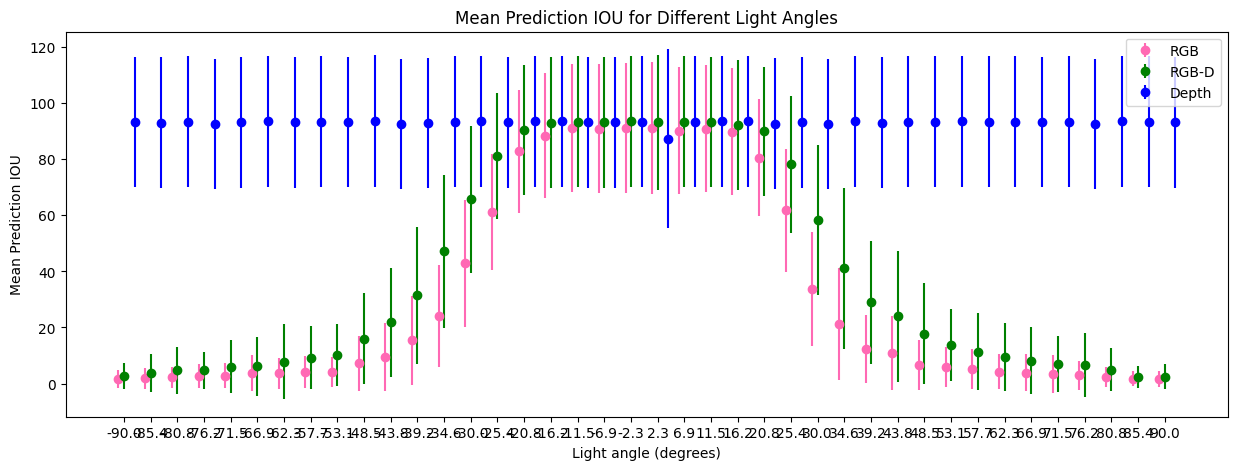

[0.38889 0.61111]


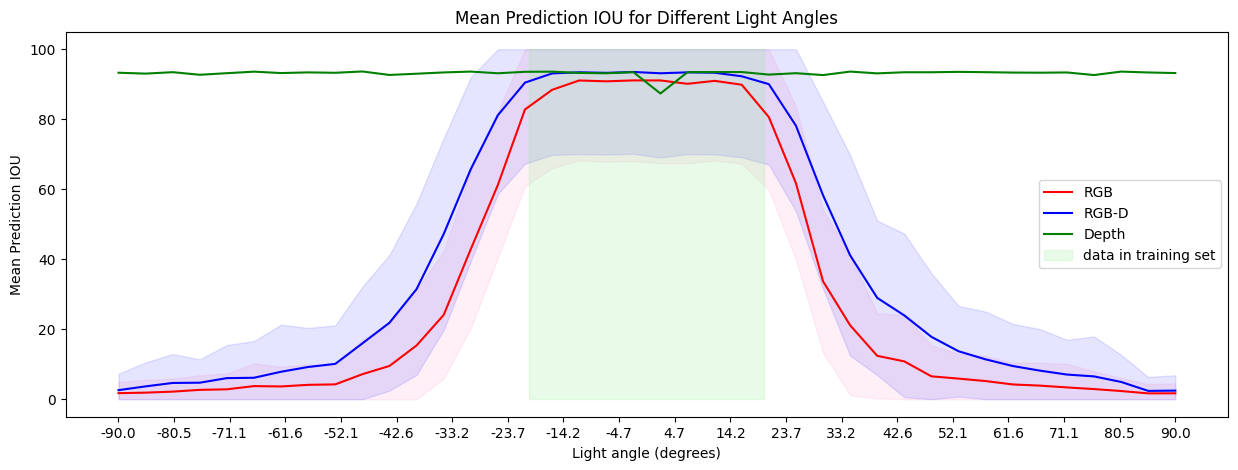

In [105]:
# code\DFormer\checkpoints\SynthDet_new_black_back_light_angle_DFormer-Tiny\run_20240423-222459
light_angle_gems_rgbd = r"..\checkpoints\SynthDet_new_black_back_light_angle_DFormer-Tiny\run_20240423-222459"
# code\DFormer\checkpoints\SynthDet_new_black_back_light_angle_DFormer-Tiny\run_20240423-232932
light_angle_gems_rgb = r"..\checkpoints\SynthDet_new_black_back_light_angle_DFormer-Tiny\run_20240423-232932"
# code\DFormer\checkpoints\SynthDet_new_black_back_light_angle_DFormer-Tiny\run_20240424-003208
light_angle_gems_depth = r"..\checkpoints\SynthDet_new_black_back_light_angle_DFormer-Tiny\run_20240424-003208"

miou_values_gems_rgbd, iou_std_values_gems_rgbd = get_results(light_angle_gems_rgbd)
miou_values_gems_rgb, iou_std_values_gems_rgb = get_results(light_angle_gems_rgb)
miou_values_gems_depth, iou_std_values_gems_depth = get_results(light_angle_gems_depth)

data = {
    "rgb_mean": np.array(miou_values_gems_rgb[-1]),
    "rgb_std": np.array(iou_std_values_gems_rgb[-1]),
    "rgb_depth_mean": np.array(miou_values_gems_rgbd[-1]),
    "rgb_depth_std": np.array(iou_std_values_gems_rgbd[-1]),
    "depth_mean": np.array(miou_values_gems_depth[-1]),
    "depth_std": np.array(iou_std_values_gems_depth[-1]),
}

colors = ['#FF69B4', 'green', 'blue']
min_angle = -90
max_angle = 90
x_labels = np.linspace(min_angle, max_angle, 40)
x_labels = [f"{label:.1f}" for label in x_labels]
print(len(x_labels), len(data["rgb_mean"]))
plot_experiment_errorbar(colors, x_labels, data, figsize=(15, 5), xtick_rotation=0)

x_labels = np.linspace(min_angle, max_angle, 20)
x_labels = [f"{label:.1f}" for label in x_labels]

plt.figure(figsize=(15, 5))
plt.plot(data["rgb_mean"], label='RGB', color='red')
plt.plot(data["rgb_depth_mean"], label='RGB-D', color='blue')
plt.plot(data["depth_mean"], label='Depth', color='green')

plt.fill_between(
    range(len(data["rgb_mean"])), 
    np.maximum(data["rgb_mean"] - data["rgb_std"], 0),
    np.minimum(data["rgb_mean"] + data["rgb_std"], 100), 
    color='#FF69B4', alpha=0.1)
plt.fill_between(
    range(len(data["rgb_depth_mean"])), 
    np.maximum(data["rgb_depth_mean"] - data["rgb_depth_std"], 0), 
    np.minimum(data["rgb_depth_mean"] + data["rgb_depth_std"], 100), 
    color='blue', alpha=0.1)

data_in_train_x_positions = np.array([0.38889, 0.61111])
print(data_in_train_x_positions)
plt.fill_between(
    [data_in_train_x_positions[0] * (len(data["rgb_mean"]) - 1), data_in_train_x_positions[1] * (len(data["rgb_mean"]) - 1)], 
    0, 100, 
    color='lightgreen', alpha=0.2, label='data in training set')

num_steps = len(x_labels)
locations = np.linspace(0, len(data["rgb_mean"]) - 1, num_steps)

plt.xticks(locations, x_labels)
plt.xlabel('Light angle (degrees)')
plt.ylabel('Mean Prediction IOU')
plt.title('Mean Prediction IOU for Different Light Angles')
plt.legend()
plt.show()


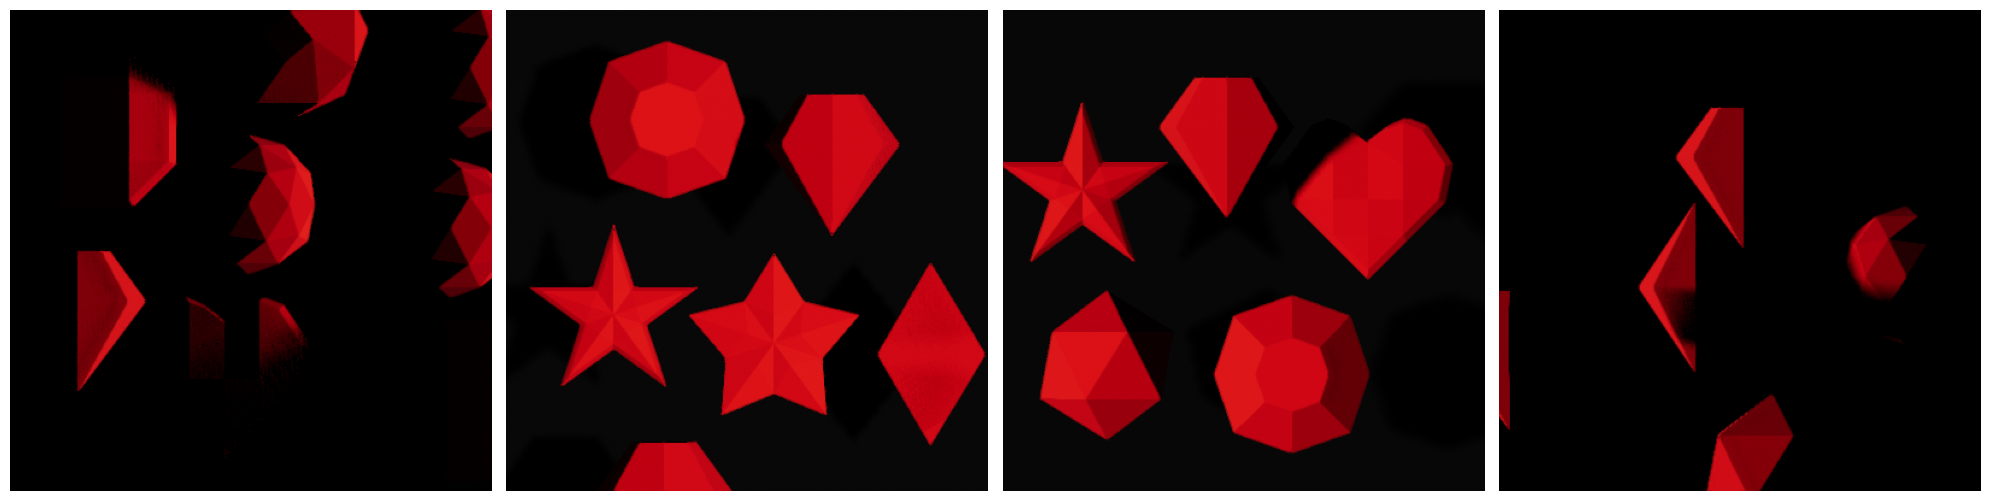

In [1]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import os


# code\DFormer\datasets\SynthDet_new_black_back_light_angle\RGB_original
# cd ..\..\DFormer\datasets\
# code\UsefullnessOfDepth\datasets\SynthDet_light_angle_distribution\RGB
# light_angle_gems_data_path = r"..\..\DFormer\datasets\SynthDet_new_black_back_light_angle\RGB_original"
light_angle_gems_data_path = r"..\..\UsefullnessOfDepth\datasets\SynthDet_light_angle_distribution\RGB"

image_files = os.listdir(light_angle_gems_data_path)
image_files = sorted(image_files)
image_files = [os.path.join(light_angle_gems_data_path, image_file) for image_file in image_files if image_file.startswith("test")]

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
# for i, image_file in image_files[::100]:
for i, image_file in enumerate(image_files[::332]):
    image = Image.open(image_file)
    ax[i].imshow(image)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

1000


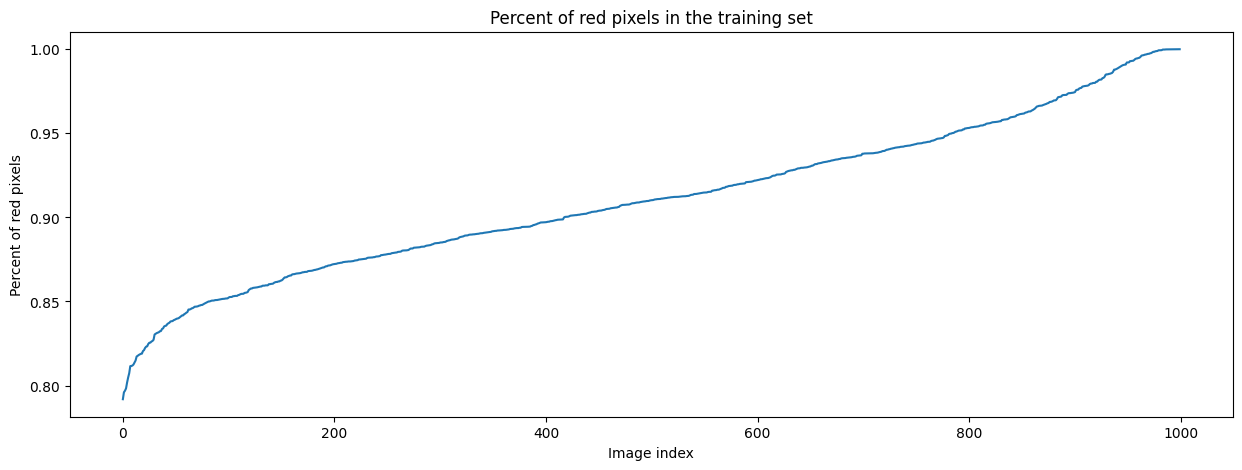

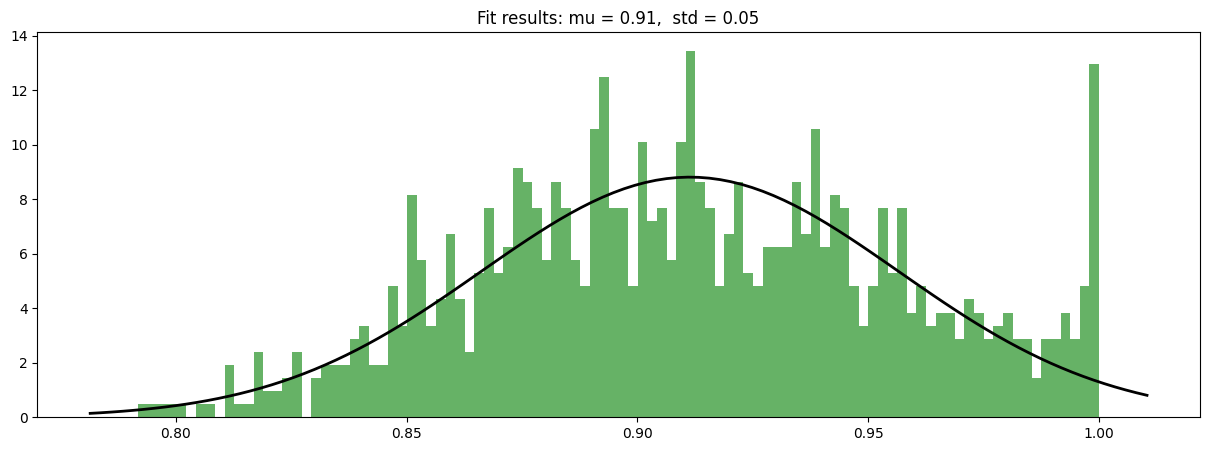

In [16]:
import numpy as np
import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_distribution_pixels_not_shaded(split="train"):
    light_angle_gems_data_path = r"..\..\UsefullnessOfDepth\datasets\SynthDet_light_angle_distribution\RGB"
    image_files = os.listdir(light_angle_gems_data_path)
    image_files = sorted(image_files)
    train_image_files = image_files = [os.path.join(light_angle_gems_data_path, image_file) for image_file in image_files if image_file.startswith(split)]
    print(len(train_image_files))
    threshold_pixel_is_red = 0.5
    percent_of_red_pixels = []
    for image_file in train_image_files:
        image = Image.open(image_file)
        image_np = np.array(image)

        red_pixels = np.where(image_np[:, :, 0] > threshold_pixel_is_red)
        percent_of_red_pixels.append(len(red_pixels[0]) / (image_np.shape[0] * image_np.shape[1]))

    sorted_percent_of_red_pixels = sorted(percent_of_red_pixels)

    plt.figure(figsize=(15, 5))
    plt.plot(sorted_percent_of_red_pixels)
    plt.xlabel('Image index')
    plt.ylabel('Percent of red pixels')
    plt.title('Percent of red pixels in the training set')
    plt.show()

    # Fit a normal distribution to the data:
    mu, std = stats.norm.fit(sorted_percent_of_red_pixels)

    # Plot the histogram.
    plt.figure(figsize=(15, 5))
    plt.hist(sorted_percent_of_red_pixels, bins=100, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()

plot_distribution_pixels_not_shaded("train")

1000


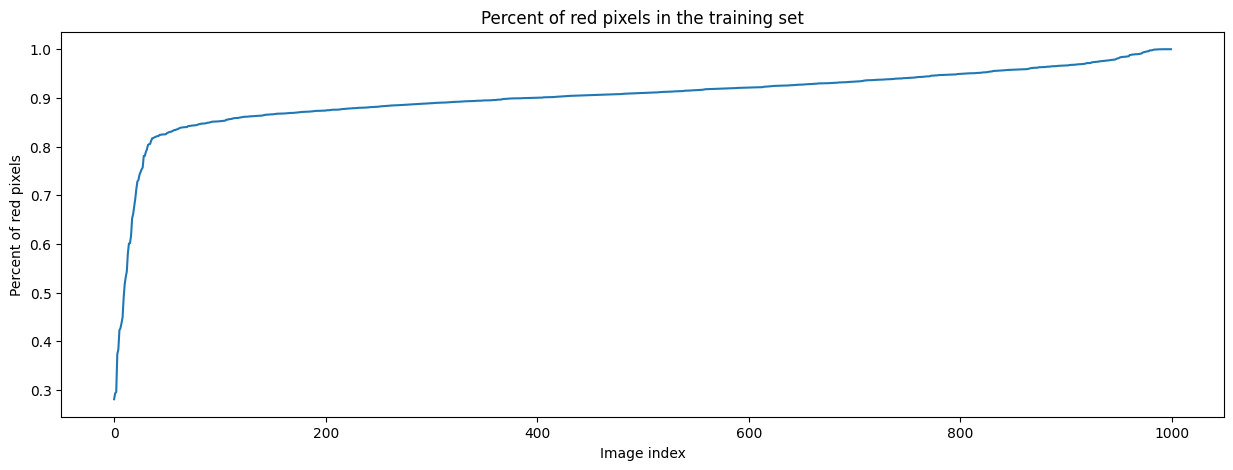

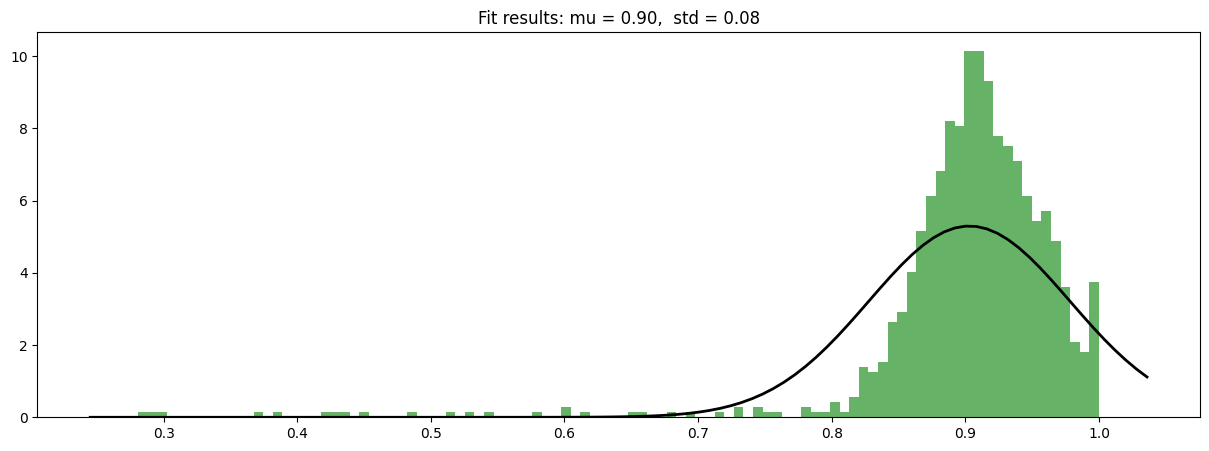

In [17]:
plot_distribution_pixels_not_shaded("test")

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib

original_sunrgbd_path = r"..\datasets\SUNRGBD\RGB"
original_depth_sunrgbd_path = r"..\datasets\SUNRGBD\Depth"

def get_images(dataset_path, split='test', num_images=10):
    images = []
    paths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.startswith(split)][:num_images]
    paths.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    images = [cv2.imread(path, cv2.IMREAD_UNCHANGED) for path in paths]

    return images

images = get_images(original_sunrgbd_path)
depth_images = get_images(original_depth_sunrgbd_path)

depth min max:  0 258


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


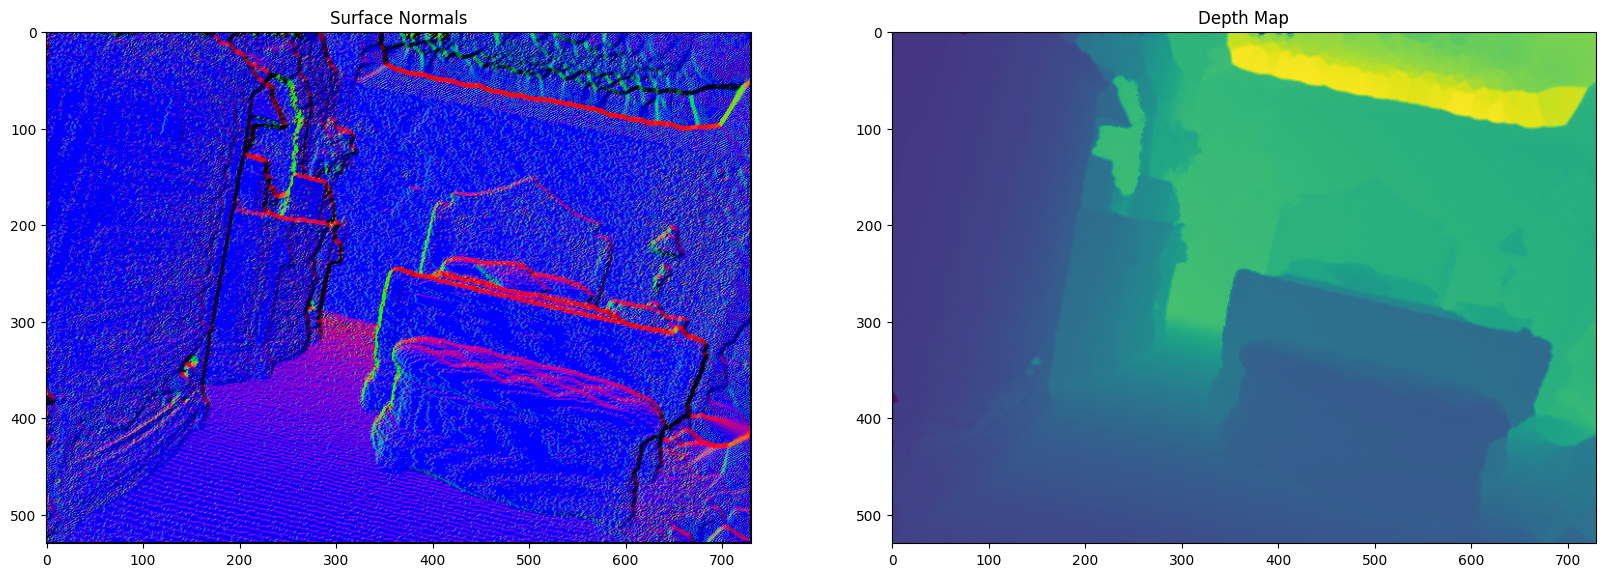

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cos_angle min max:  -0.9996349811553955 0.9999440312385559


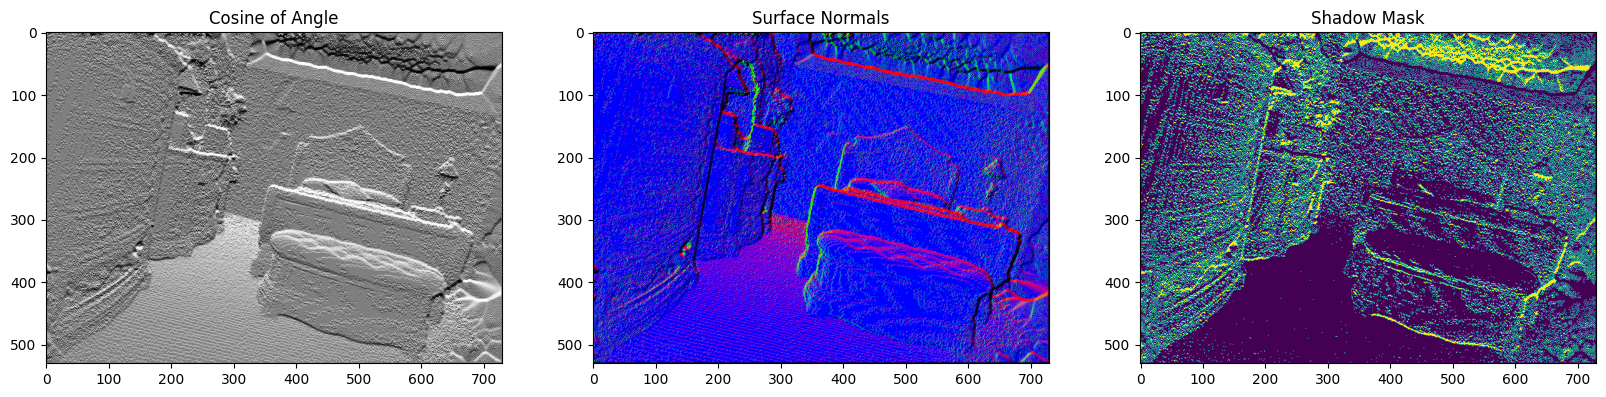

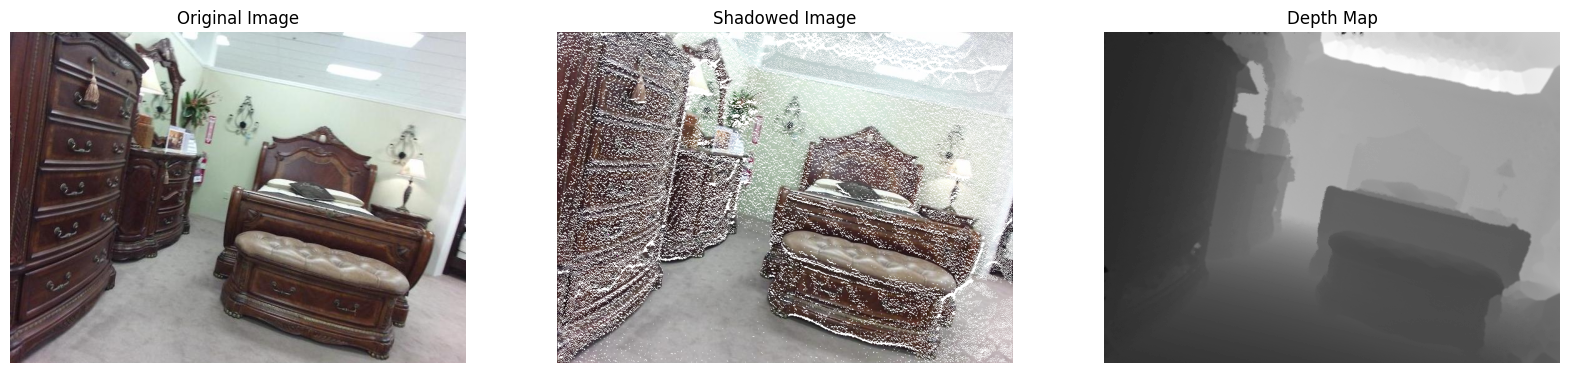

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and depth map
image = images[0]
depth_map = depth_images[0]
depth_map = (depth_map - np.min(depth_map)) / (np.max(depth_map) - np.min(depth_map)) * 255
depth_map = depth_map.astype(np.uint16)
depth_map = cv2.inpaint(depth_map, (depth_map == 0).astype(np.uint8), inpaintRadius=3, flags=cv2.INPAINT_TELEA)

print("depth min max: ", np.min(depth_map), np.max(depth_map))

def compute_normals(depth_image):
    # Compute the x and y derivatives
    dy, dx = np.gradient(depth_image)

    # Normalize the gradients
    dx = dx / np.max(dx)
    dy = dy / np.max(dy)

    dx = dx[..., np.newaxis]
    dy = dy[..., np.newaxis]
    dz = np.ones_like(dx)

    # Stack them together
    gradient = np.concatenate([dx, dy, dz], axis=-1)

    # Compute the cross product, which gives the surface normal
    normals = np.cross(gradient, np.roll(gradient, shift=-1, axis=-1))

    # Normalize the normals
    normals = normals / np.linalg.norm(normals, axis=-1, keepdims=True)

    return normals

def compute_better_normals(depth):
    # Assuming depth is your depth image
    depth = depth.astype(np.int16)

    # Initialize an empty array for the normals
    normals = np.zeros((depth.shape[0], depth.shape[1], 3), dtype=np.float32)

    for x in range(1, depth.shape[0] - 1):
        for y in range(1, depth.shape[1] - 1):
            dzdx = (depth[x+1, y] - depth[x-1, y]) / 2.0
            dzdy = (depth[x, y+1] - depth[x, y-1]) / 2.0

            d = np.array([-dzdx, -dzdy, 1.0])
            n = d / np.linalg.norm(d)

            normals[x, y] = n

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(normals)
    ax[0].set_title('Surface Normals')
    ax[1].imshow(depth)
    ax[1].set_title('Depth Map')
    plt.show()

    return normals

def compute_shadow(image, depth_map, normals, light_angle):
    # Convert light angle to radians
    light_angle_rad = np.deg2rad(light_angle)
    
    # # Compute gradients of the depth map
    # dx, dy = np.gradient(depth_map)
    
    # # Compute surface normals
    # surface_normals = np.dstack((-dx, -dy, np.ones_like(depth_map)))
    # surface_normals /= np.linalg.norm(surface_normals, axis=2, keepdims=True)
    surface_normals = normals

    # Compute light direction
    light_direction = np.array([np.cos(light_angle_rad), np.sin(light_angle_rad), 0])
    
    # Compute angle between surface normals and light direction
    cos_angle = np.sum(surface_normals * light_direction, axis=2)

    print("cos_angle min max: ", np.min(cos_angle), np.max(cos_angle))
    # Threshold angle to determine shadowed regions
    shadowed_regions = cos_angle < 0  # Adjust threshold as needed
    
    # Create shadow mask
    shadow_mask = np.zeros_like(depth_map)
    shadow_mask[shadowed_regions] = 255  # Adjust shadow intensity as needed

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(cos_angle, cmap='gray')
    ax[0].set_title('Cosine of Angle')
    ax[1].imshow(surface_normals)
    ax[1].set_title('Surface Normals')
    ax[2].imshow(shadow_mask)
    ax[2].set_title('Shadow Mask')
    plt.show()
    
    # Apply shadow to image
    shadowed_image = np.clip(image * (1 - shadow_mask[..., np.newaxis]), 0, 255).astype(np.uint8)
    
    return shadowed_image

# Compute surface normals
normals = compute_better_normals(depth_map)
shadowed_image = compute_shadow(image, depth_map, normals, light_angle=0)

# Display the result
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(shadowed_image, cv2.COLOR_BGR2RGB))
plt.title('Shadowed Image')
plt.axis('off')
# Show depth
plt.subplot(1, 3, 3)
plt.imshow(depth_map, cmap='gray')
plt.title('Depth Map')
plt.axis('off')
plt.show()

In [4]:
import cv2
import numpy as np

# Define the Sobel filters for computing the gradients in the x and y directions
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Compute the gradients in the x and y directions
grad_x = cv2.filter2D(normals[..., 0], cv2.CV_32F, sobel_x)
grad_y = cv2.filter2D(normals[..., 1], cv2.CV_32F, sobel_y)

# Compute the gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_dir = np.arctan2(grad_y, grad_x)

# Find the direction of the greatest change
max_dir = np.unravel_index(np.argmax(grad_mag), grad_mag.shape)

# Set the normal of the pixel at the location of the greatest change to the direction of the greatest change
new_normals = normals.copy()
new_normals[max_dir[0], max_dir[1], 0] = np.cos(grad_dir[max_dir])
new_normals[max_dir[0], max_dir[1], 1] = np.sin(grad_dir[max_dir])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


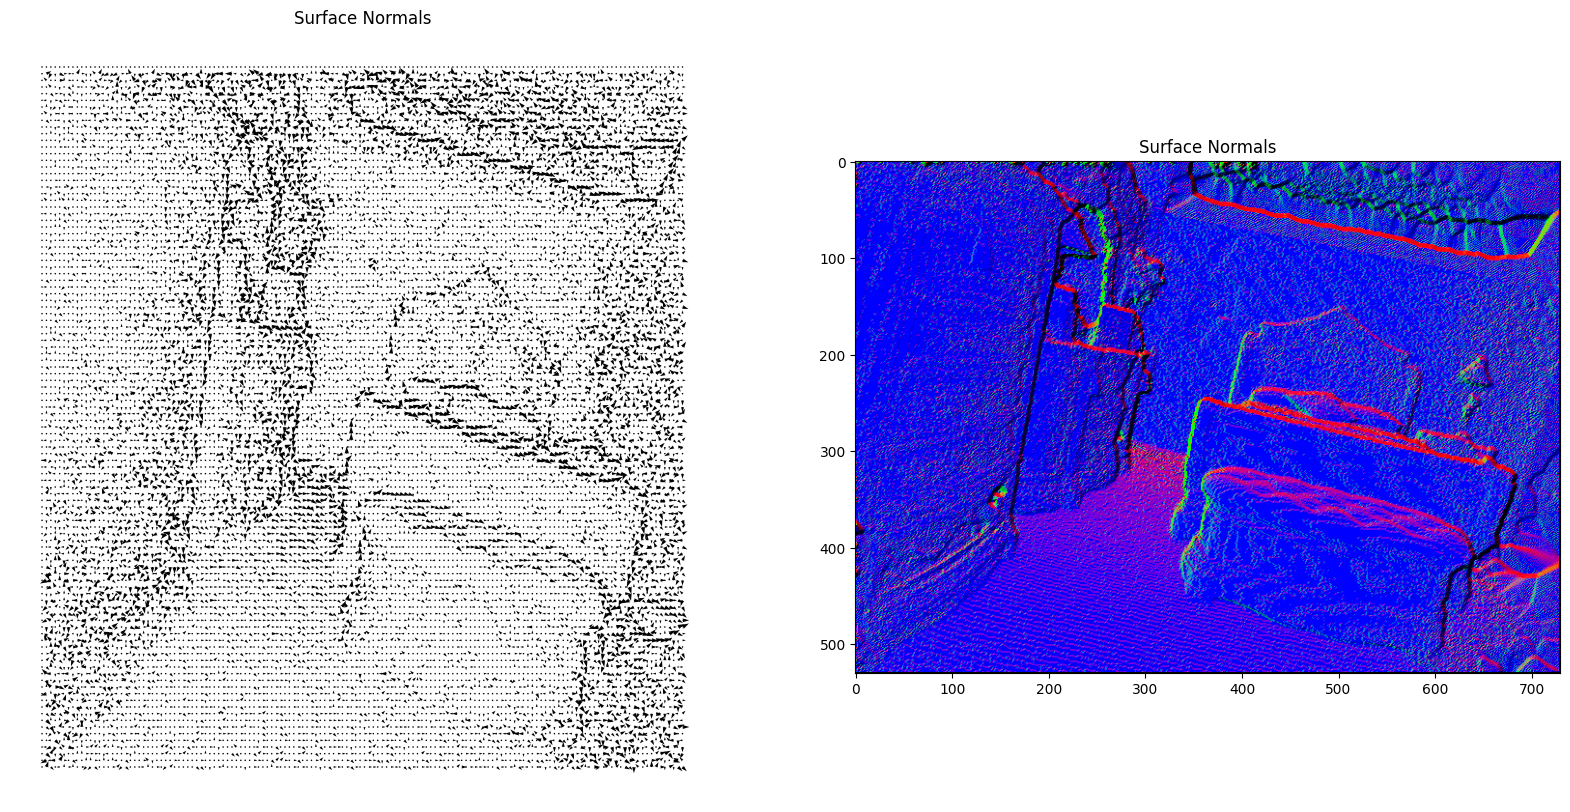

In [5]:
import matplotlib.pyplot as plt

# Downsample the normals for a more readable plot
downsample_factor = 5
normals_ds = new_normals[::downsample_factor, ::downsample_factor]

# Create a grid of x and y coordinates
y, x = np.mgrid[0:new_normals.shape[0]:downsample_factor, 0:new_normals.shape[1]:downsample_factor]

# Plot the normals as arrows
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.quiver(x, y, normals_ds[..., 0], normals_ds[..., 1])
plt.gca().invert_yaxis()  # Invert the y-axis to match the image coordinate system
plt.title('Surface Normals')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normals, cmap='gray')
plt.title('Surface Normals')

plt.show()

shades min max:  0.0 256.5497317314148


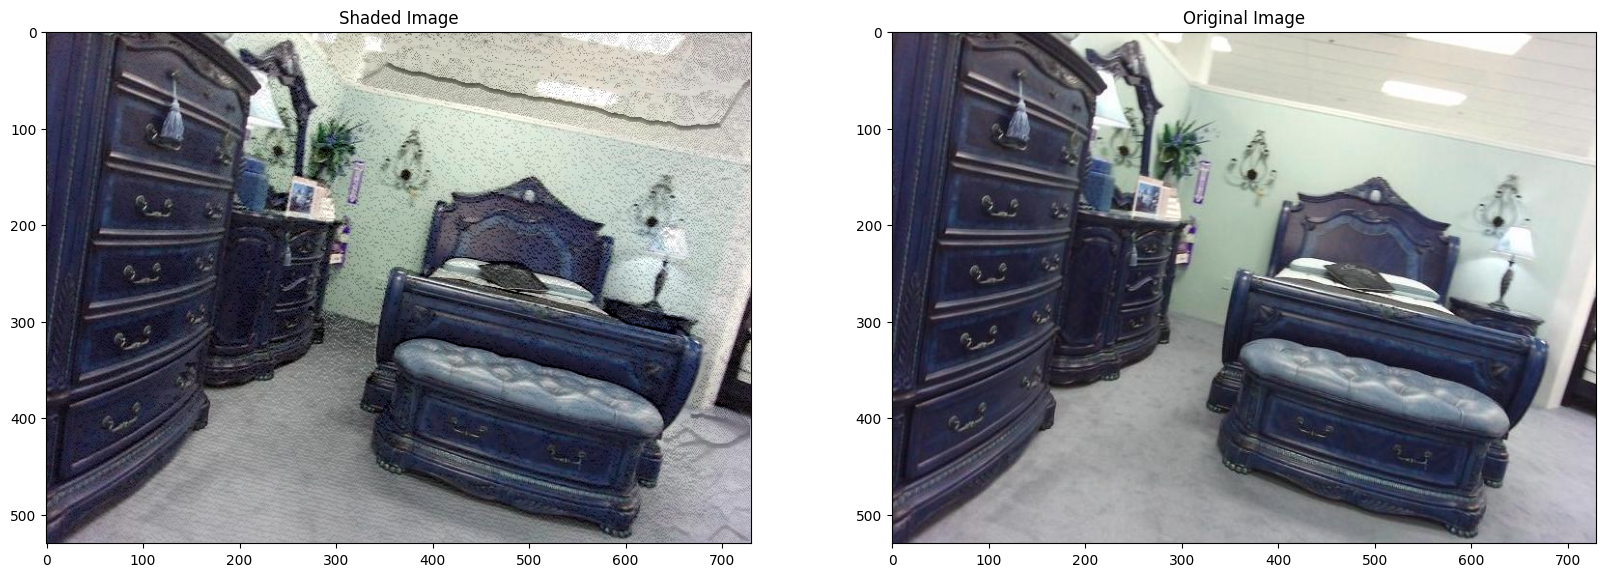

In [6]:
def shade_image(surface_normals, light_direction, depth_map):
    # Normalize the light direction vector
    light_direction = light_direction / np.linalg.norm(light_direction)
    
    # Compute dot product of surface normals and light direction
    dot_product = np.dot(surface_normals, light_direction)
    
    # Clip dot product to avoid negative values
    dot_product = np.clip(dot_product, 0, 1)
    
    # Apply shading using dot product as intensity
    shaded_image = dot_product * depth_map
    
    return shaded_image

# Define the light direction
light_direction = np.array([1, 0, 0])

# Shade the image
shades = shade_image(new_normals, light_direction, depth_map)
print("shades min max: ", np.min(shades), np.max(shades))

shaded_image = image - shades[..., np.newaxis] * 0.5
shaded_image = np.clip(shaded_image, 0, 255).astype(np.uint8)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(shaded_image)
ax[0].set_title('Shaded Image')
ax[1].imshow(image)
ax[1].set_title('Original Image')
plt.show()

In [7]:
def generate_synthetic_right_image(image, depth_map, baseline_distance):
    # Assume baseline distance in pixels
    baseline_pixels = 100

    # Compute shift amount based on depth and baseline distance
    shift_amount = (baseline_distance / baseline_pixels) * depth_map

    # Shift the image horizontally to create synthetic right image
    synthetic_right_image = np.roll(image, -shift_amount, axis=1)

    return synthetic_right_image

def compute_disparity(left_image, right_image):
    # Compute disparity by finding horizontal shift between images
    disparity = np.argmax(np.abs(left_image - right_image), axis=1)

    return disparity


# Assume baseline distance in meters
baseline_distance = 0.1  # 10 cm

# Generate synthetic right image
synthetic_right_image = generate_synthetic_right_image(image, depth_map, baseline_distance)

# Compute disparity
disparity_map = compute_disparity(image, synthetic_right_image)

# Show or save the disparity map
cv2.imshow('Disparity Map', disparity_map)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: 'shift' and 'axis' should be scalars or 1D sequences

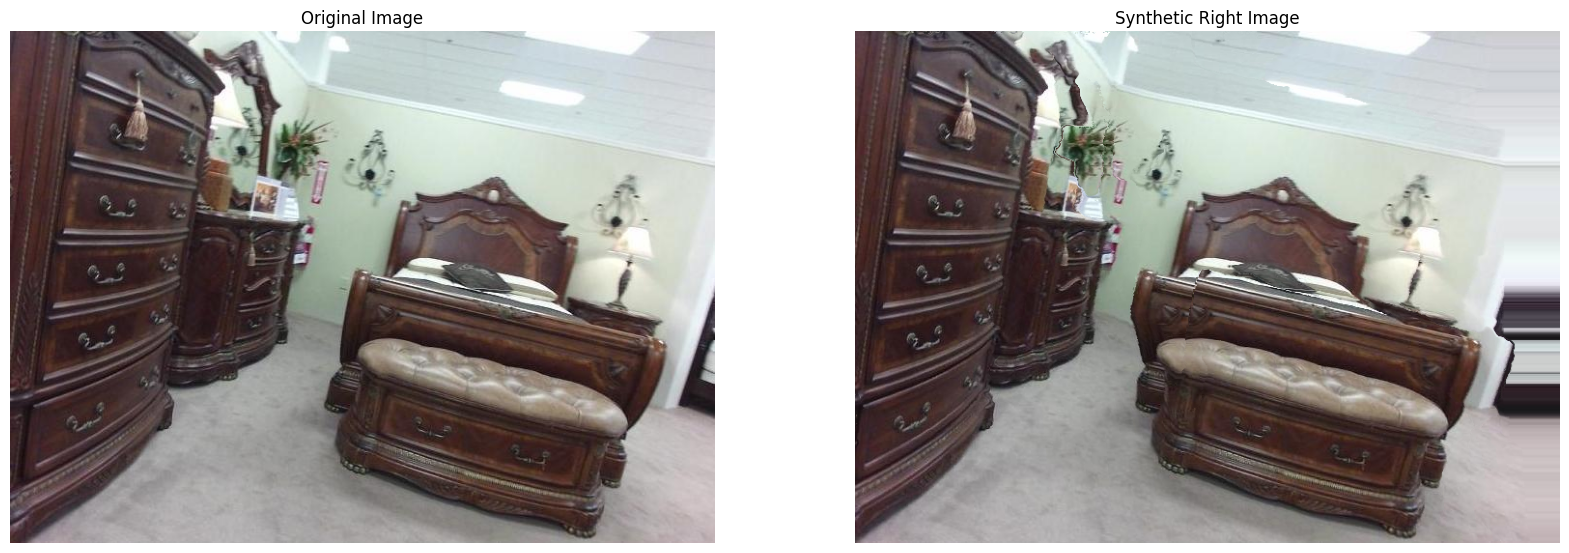

In [ ]:
import numpy as np
from scipy.ndimage import map_coordinates

def shift_image_horizontally(image, shift_amount):
    """
    Shifts the image horizontally by the specified shift amount.

    Args:
    - image: Input image of shape (height, width, channels).
    - shift_amount: Amount to shift the image horizontally for each pixel.
                    It should have the same shape as the input image.

    Returns:
    - Shifted image.
    """
    height, width, channels = image.shape

    # Generate coordinate grids for interpolation
    y_coords, x_coords = np.indices((height, width))

    # Shift the x coordinates by the shift_amount
    shifted_x_coords = x_coords + shift_amount

    # Clip shifted coordinates to valid range
    shifted_x_coords = np.clip(shifted_x_coords, 0, width - 1)

    # Interpolate pixel values at shifted coordinates
    shifted_image = np.zeros_like(image)
    for c in range(channels):
        shifted_image[..., c] = map_coordinates(image[..., c], [y_coords, shifted_x_coords], mode='nearest')

    return shifted_image

# Example usage

# Assume baseline distance in pixels
baseline_distance_pixels = 1

# Convert depth map to shift amount
shift_amount = (baseline_distance_pixels / depth_map.shape[1]) * depth_map

# Generate synthetic right image
synthetic_right_image = shift_image_horizontally(image, shift_amount)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(synthetic_right_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Synthetic Right Image')
ax[1].axis('off')
plt.show()

In [2]:
import numpy as np
import open3d as o3d
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib

# Maybe use this?
# https://github.com/hesom/depth_to_mesh/blob/master/depth_to_mesh/__main__.py

original_sunrgbd_path = r"..\datasets\SUNRGBD\RGB"
original_depth_sunrgbd_path = r"..\datasets\SUNRGBD\Depth"

def get_images(dataset_path, split='test', num_images=10):
    images = []
    paths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.startswith(split)][:num_images]
    paths.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    images = [cv2.imread(path, cv2.IMREAD_UNCHANGED) for path in paths]

    return images

images = get_images(original_sunrgbd_path)
depth_images = get_images(original_depth_sunrgbd_path)

def create_point_cloud(depth_map, fx, fy, cx, cy, scale=1.0):
    """
    Create a point cloud from a depth map.

    Args:
    - depth_map: 2D numpy array representing the depth map.
    - fx: Horizontal focal length.
    - fy: Vertical focal length.
    - cx: Horizontal principal point.
    - cy: Vertical principal point.
    - scale: Scaling factor for the depth values (optional, default is 1.0).

    Returns:
    - point_cloud: Open3D point cloud object.
    """
    height, width = depth_map.shape

    # Create arrays of pixel coordinates
    v, u = np.indices((height, width), dtype=np.float32)

    # Convert pixel coordinates to 3D coordinates
    x = (u - cx) * depth_map / fx * scale
    y = (v - cy) * depth_map / fy * scale
    z = depth_map * scale

    # Flatten the arrays
    points = np.stack((x.flatten(), y.flatten(), z.flatten()), axis=-1)

    # Create Open3D point cloud
    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector(points)

    return point_cloud

def main(depth_image):
    # Load depth map from file image
    depth_map = np.array(depth_image)

    # Camera intrinsics (replace with your camera parameters)
    fx = 500  # Horizontal focal length
    fy = 500  # Vertical focal length
    cx = depth_map.shape[1] / 2  # Horizontal principal point
    cy = depth_map.shape[0] / 2  # Vertical principal point

    # Create point cloud from depth map
    point_cloud = create_point_cloud(depth_map, fx, fy, cx, cy)

    # Visualize point cloud
    o3d.visualization.draw_geometries([point_cloud])

depth_image = depth_images[0]
main(depth_image)
